# Análisis del Riesgo de Obesidad y problemas CardioVasculares


# Carga de librerías y configuraciones

In [1]:
# warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carga funciones propias reutilizables  de librerías
import os as so
import sys
utils_path = so.path.join(so.getcwd(), '..', 'utils')
sys.path.append(utils_path)

In [3]:
class PATH():
    RAW = '../data/raw//'
    PROCESSED= '../data/processed//'
    MODELS = '../models//'
    REPORTS = '../reports//'


In [4]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
import pandas as pd
import numpy as np


In [6]:
# pandas config
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# seaborn config
colors_palette=sns.color_palette('colorblind')

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [10]:
import python_clustering

In [11]:
from BorutaShap import BorutaShap

In [12]:
from utils import *

# EDA

## Carga datos


In [16]:
df_train = pd.read_csv(PATH.RAW + 'train.csv')
df_test = pd.read_csv(PATH.RAW +'test.csv')

## Significado de las columnas

Los atributos relacionados con los hábitos alimenticios son: 
- Consumo frecuente de alimentos altos en calorías (FAVC)
- Frecuencia de consumo de vegetales (FCVC)
- Número de comidas principales (NCP)
- Consumo de alimentos entre comidas (CAEC)
- Consumo de agua diario (CH20)
- Consumo de alcohol (CALC)

Los atributos relacionados con la condición física son: 
- Monitoreo del consumo de calorías (SCC)
- Frecuencia de actividad física (FAF)
- Tiempo utilizando dispositivos tecnológicos (TUE)
- Transporte utilizado (MTRANS)

Variables obtenidas: Género, Edad, Altura y Peso.

Los valores de NObesidad son:

- Bajo peso: Menos de 18.5
- Normal: 18.5 a 24.9
- Sobrepeso: 25.0 a 29.9
- Obesidad I: 30.0 a 34.9
- Obesidad II: 35.0 a 39.9
- Obesidad III: Más de 40

Los datos contienen datos numéricos y datos continuos, por lo que pueden ser utilizados para análisis basados en algoritmos de clasificación, predicción, segmentación y asociación.

## Objetivo
Tenemos que predecir el riesgo de obesidad en individuos.

## Descripción del conjunto de datos

| Columna                        | Forma completa                   | Descripción                                                                                                          |
|-------------------------------|----------------------------------|----------------------------------------------------------------------------------------------------------------------|
| 'id'                          | id                               | Único para cada persona (fila)                                                                                       |
| 'Gender'                      | Género                           | Género de la persona                                                                                                 |
| 'Age'                        | Edad                             | Dtype es float. La edad está entre 14 años y 61 años                                                                 |
| 'Height'                      | Altura                           | La altura está en metros, está entre 1,45 m y 1,98 m                                                                |
| 'Weight'                        | Peso                             | El peso está entre 39 y 165. Creo que está en Kg.                                                                   |
| 'family_history_with_overweight' | historia familiar con sobrepeso | pregunta de sí o no                                                                                                  |
| 'FAVC'                        | Consumo frecuente de alimentos altos en calorías | pregunta de sí o no. Creo que la pregunta que hicieron es si consumes alimentos altos en calorías                |
| 'FCVC'                        | Frecuencia de consumo de verduras | Similar a FAVC. También es una pregunta de sí o no                                                                  |
| 'NCP'                         | Número de comidas principales   | dtype es float, NCP está entre 1 y 4. Creo que debería ser 1,2,3,4 pero nuestros datos son sintéticos así que toma valores flotantes |
| 'CAEC'                        | Consumo de alimentos entre comidas | toma 4 valores: A veces, Frecuentemente, no y Siempre                                                              |
| 'SMOKE'                       | Fumar                            | pregunta de sí o no. Creo que la pregunta es "¿Fumas?"                                                              |
| 'CH2O'                        | Consumo de agua diario          | CH2O toma valores entre 1 y 3. de nuevo se da como flotante: los valores deberían ser 1,2 o 3 |
| 'SCC'                         | Monitoreo del consumo de calorías | pregunta de sí o no                                                                                                  |
| 'FAF'                         | Frecuencia de actividad física  | FAF está entre 0 y 3, 0 significa no hay actividad física y 3 significa un alto nivel de ejercicio. y nuevamente, en nuestros datos se da como flotante |
| 'TUE'                         | Tiempo utilizando dispositivos tecnológicos | TUE está entre 0 y 2. Creo que la pregunta será "¿Cuánto tiempo has estado usando dispositivos tecnológicos para rastrear tu salud?" en nuestros datos se da como flotante |
| 'CALC'                        | Consumo de alcohol              | Toma 3 valores: A veces, no, Frecuentemente                                                                          |
| 'MTRANS'                      | Transporte utilizado            | MTRANS toma 5 valores: Transporte Público, Automóvil, Caminar, Motocicleta y Bicicleta                            |
| 'NObeyesdad'                  | OBJETIVO                         | Objetivo, toma 7 valores, y en esta competencia tenemos que dar el nombre de la clase (No la Probabilidad, que es el caso en la mayoría de las competiciones). |


## Diccionarios

In [17]:
diccionario_columnas = {
    'FAVC': 'Consumo frecuente de alimentos altos en calorías',
    'FCVC': 'Frecuencia de consumo de vegetales',
    'NCP': 'Número de comidas principales',
    'CAEC': 'Consumo de alimentos entre comidas',
    'CH20': 'Consumo de agua diario',
    'CALC': 'Consumo de alcohol',
    'SCC': 'Monitoreo del consumo de calorías',
    'FAF': 'Frecuencia de actividad física',
    'TUE': 'Tiempo utilizando dispositivos tecnológicos',
    'MTRANS': 'Transporte utilizado',
    'Age':'Edad',
    'Height': 'Altura',
    'Weight':'Peso',
    'SMOKE':'Fumador',
    'Gender':'Género',
    'IMC':'Indice de Masa Corporal',
    'HA': 'Hábitos alimienticios',
    'UT': 'Uso de Tecnología',
    'family_history_with_overweight':'Historial familiar con sobrepeso'
}


## Target
   

In [17]:
target = "NObeyesdad"

In [19]:
dict_target={'Insufficient_Weight': 0,
 'Normal_Weight': 1,
 'Overweight_Level_I': 2,
 'Overweight_Level_II': 3,
  'Obesity_Type_I': 4,
 'Obesity_Type_II': 5,
 'Obesity_Type_III': 6,}


In [20]:
dictrev_target={v:k for k,v in  dict_target.items()}


1.3 Vistazo rápido

In [18]:
df=df_train.copy()

In [19]:
df.head()

id  Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0   0    Male 24.44    1.70   81.67                            yes  yes  2.00   
1   1  Female 18.00    1.56   57.00                            yes  yes  2.00   
2   2  Female 18.00    1.71   50.17                            yes  yes  1.88   
3   3  Female 20.95    1.71  131.27                            yes  yes  3.00   
4   4    Male 31.64    1.91   93.80                            yes  yes  2.68   

   NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
0 2.98   Sometimes    no  2.76  no 0.00 0.98  Sometimes   
1 3.00  Frequently    no  2.00  no 1.00 1.00         no   
2 1.41   Sometimes    no  1.91  no 0.87 1.67         no   
3 3.00   Sometimes    no  1.67  no 1.47 0.78  Sometimes   
4 1.97   Sometimes    no  1.98  no 1.97 0.93  Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation  Overweight_Level_II  
1             Automobile        Normal_Weight  
2  Public_Transportation  Insufficient_Weight  
3  Public_Transportation     Obesity_Type_III  
4  Public_Transportation  Overweight_Level_II

In [20]:
df.tail()

id Gender   Age  Height  Weight family_history_with_overweight FAVC  \
20753  20753   Male 25.14    1.77  114.19                            yes  yes   
20754  20754   Male 18.00    1.71   50.00                             no  yes   
20755  20755   Male 20.10    1.82  105.58                            yes  yes   
20756  20756   Male 33.85    1.70   83.52                            yes  yes   
20757  20757   Male 26.68    1.82  118.13                            yes  yes   

       FCVC  NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
20753  2.92 3.00   Sometimes    no  2.15  no 1.33 0.20  Sometimes   
20754  3.00 4.00  Frequently    no  1.00  no 2.00 1.00  Sometimes   
20755  2.41 3.00   Sometimes    no  2.00  no 1.16 1.20         no   
20756  2.67 1.97   Sometimes    no  2.14  no 0.00 0.97         no   
20757  3.00 3.00   Sometimes    no  2.00  no 0.68 0.71  Sometimes   

                      MTRANS           NObeyesdad  
20753  Public_Transportation      Obesity_Type_II  
20754  Public_Transportation  Insufficient_Weight  
20755  Public_Transportation      Obesity_Type_II  
20756             Automobile  Overweight_Level_II  
20757  Public_Transportation      Obesity_Type_II

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [22]:
df.describe(include='all').T

count unique                    top   freq  \
id                             20758.00    NaN                    NaN    NaN   
Gender                            20758      2                 Female  10422   
Age                            20758.00    NaN                    NaN    NaN   
Height                         20758.00    NaN                    NaN    NaN   
Weight                         20758.00    NaN                    NaN    NaN   
family_history_with_overweight    20758      2                    yes  17014   
FAVC                              20758      2                    yes  18982   
FCVC                           20758.00    NaN                    NaN    NaN   
NCP                            20758.00    NaN                    NaN    NaN   
CAEC                              20758      4              Sometimes  17529   
SMOKE                             20758      2                     no  20513   
CH2O                           20758.00    NaN                    NaN    NaN   
SCC                               20758      2                     no  20071   
FAF                            20758.00    NaN                    NaN    NaN   
TUE                            20758.00    NaN                    NaN    NaN   
CALC                              20758      3              Sometimes  15066   
MTRANS                            20758      5  Public_Transportation  16687   
NObeyesdad                        20758      7       Obesity_Type_III   4046   

                                   mean     std   min     25%      50%  \
id                             10378.50 5992.46  0.00 5189.25 10378.50   
Gender                              NaN     NaN   NaN     NaN      NaN   
Age                               23.84    5.69 14.00   20.00    22.82   
Height                             1.70    0.09  1.45    1.63     1.70   
Weight                            87.89   26.38 39.00   66.00    84.06   
family_history_with_overweight      NaN     NaN   NaN     NaN      NaN   
FAVC                                NaN     NaN   NaN     NaN      NaN   
FCVC                               2.45    0.53  1.00    2.00     2.39   
NCP                                2.76    0.71  1.00    3.00     3.00   
CAEC                                NaN     NaN   NaN     NaN      NaN   
SMOKE                               NaN     NaN   NaN     NaN      NaN   
CH2O                               2.03    0.61  1.00    1.79     2.00   
SCC                                 NaN     NaN   NaN     NaN      NaN   
FAF                                0.98    0.84  0.00    0.01     1.00   
TUE                                0.62    0.60  0.00    0.00     0.57   
CALC                                NaN     NaN   NaN     NaN      NaN   
MTRANS                              NaN     NaN   NaN     NaN      NaN   
NObeyesdad                          NaN     NaN   NaN     NaN      NaN   

                                    75%      max  
id                             15567.75 20757.00  
Gender                              NaN      NaN  
Age                               26.00    61.00  
Height                             1.76     1.98  
Weight                           111.60   165.06  
family_history_with_overweight      NaN      NaN  
FAVC                                NaN      NaN  
FCVC                               3.00     3.00  
NCP                                3.00     4.00  
CAEC                                NaN      NaN  
SMOKE                               NaN      NaN  
CH2O                               2.55     3.00  
SCC                                 NaN      NaN  
FAF                                1.59     3.00  
TUE                                1.00     2.00  
CALC                                NaN      NaN  
MTRANS                              NaN      NaN  
NObeyesdad                          NaN      NaN

In [23]:
data_report(df)

COL_N             id  Gender      Age   Height   Weight  \
DATA_TYPE      int64  object  float64  float64  float64   
MISSINGS (%)    0.00    0.00     0.00     0.00     0.00   
UNIQUE_VALUES  20758       2     1703     1833     1979   
CARDIN (%)    100.00    0.01     8.20     8.83     9.53   

COL_N         family_history_with_overweight    FAVC     FCVC      NCP  \
DATA_TYPE                             object  object  float64  float64   
MISSINGS (%)                            0.00    0.00     0.00     0.00   
UNIQUE_VALUES                              2       2      934      689   
CARDIN (%)                              0.01    0.01     4.50     3.32   

COL_N            CAEC   SMOKE     CH2O     SCC      FAF      TUE    CALC  \
DATA_TYPE      object  object  float64  object  float64  float64  object   
MISSINGS (%)     0.00    0.00     0.00    0.00     0.00     0.00    0.00   
UNIQUE_VALUES       4       2     1506       2     1360     1297       3   
CARDIN (%)       0.02    0.01     7.26    0.01     6.55     6.25    0.01   

COL_N          MTRANS NObeyesdad  
DATA_TYPE      object     object  
MISSINGS (%)     0.00       0.00  
UNIQUE_VALUES       5          7  
CARDIN (%)       0.02       0.03

Highlights: Sin missings, no tiene mucha cardinalidad.

In [24]:
contains_inf = df.isin([np.inf, -np.inf]).any().any()
contains_inf

False

No hay infinitos

In [25]:
duplicados = df.duplicated().any()
duplicados

False

Sin duplicados

In [26]:
categoricas = df.columns[df.dtypes=="object"].tolist()
numericas = df.columns[df.dtypes!="object"].tolist()

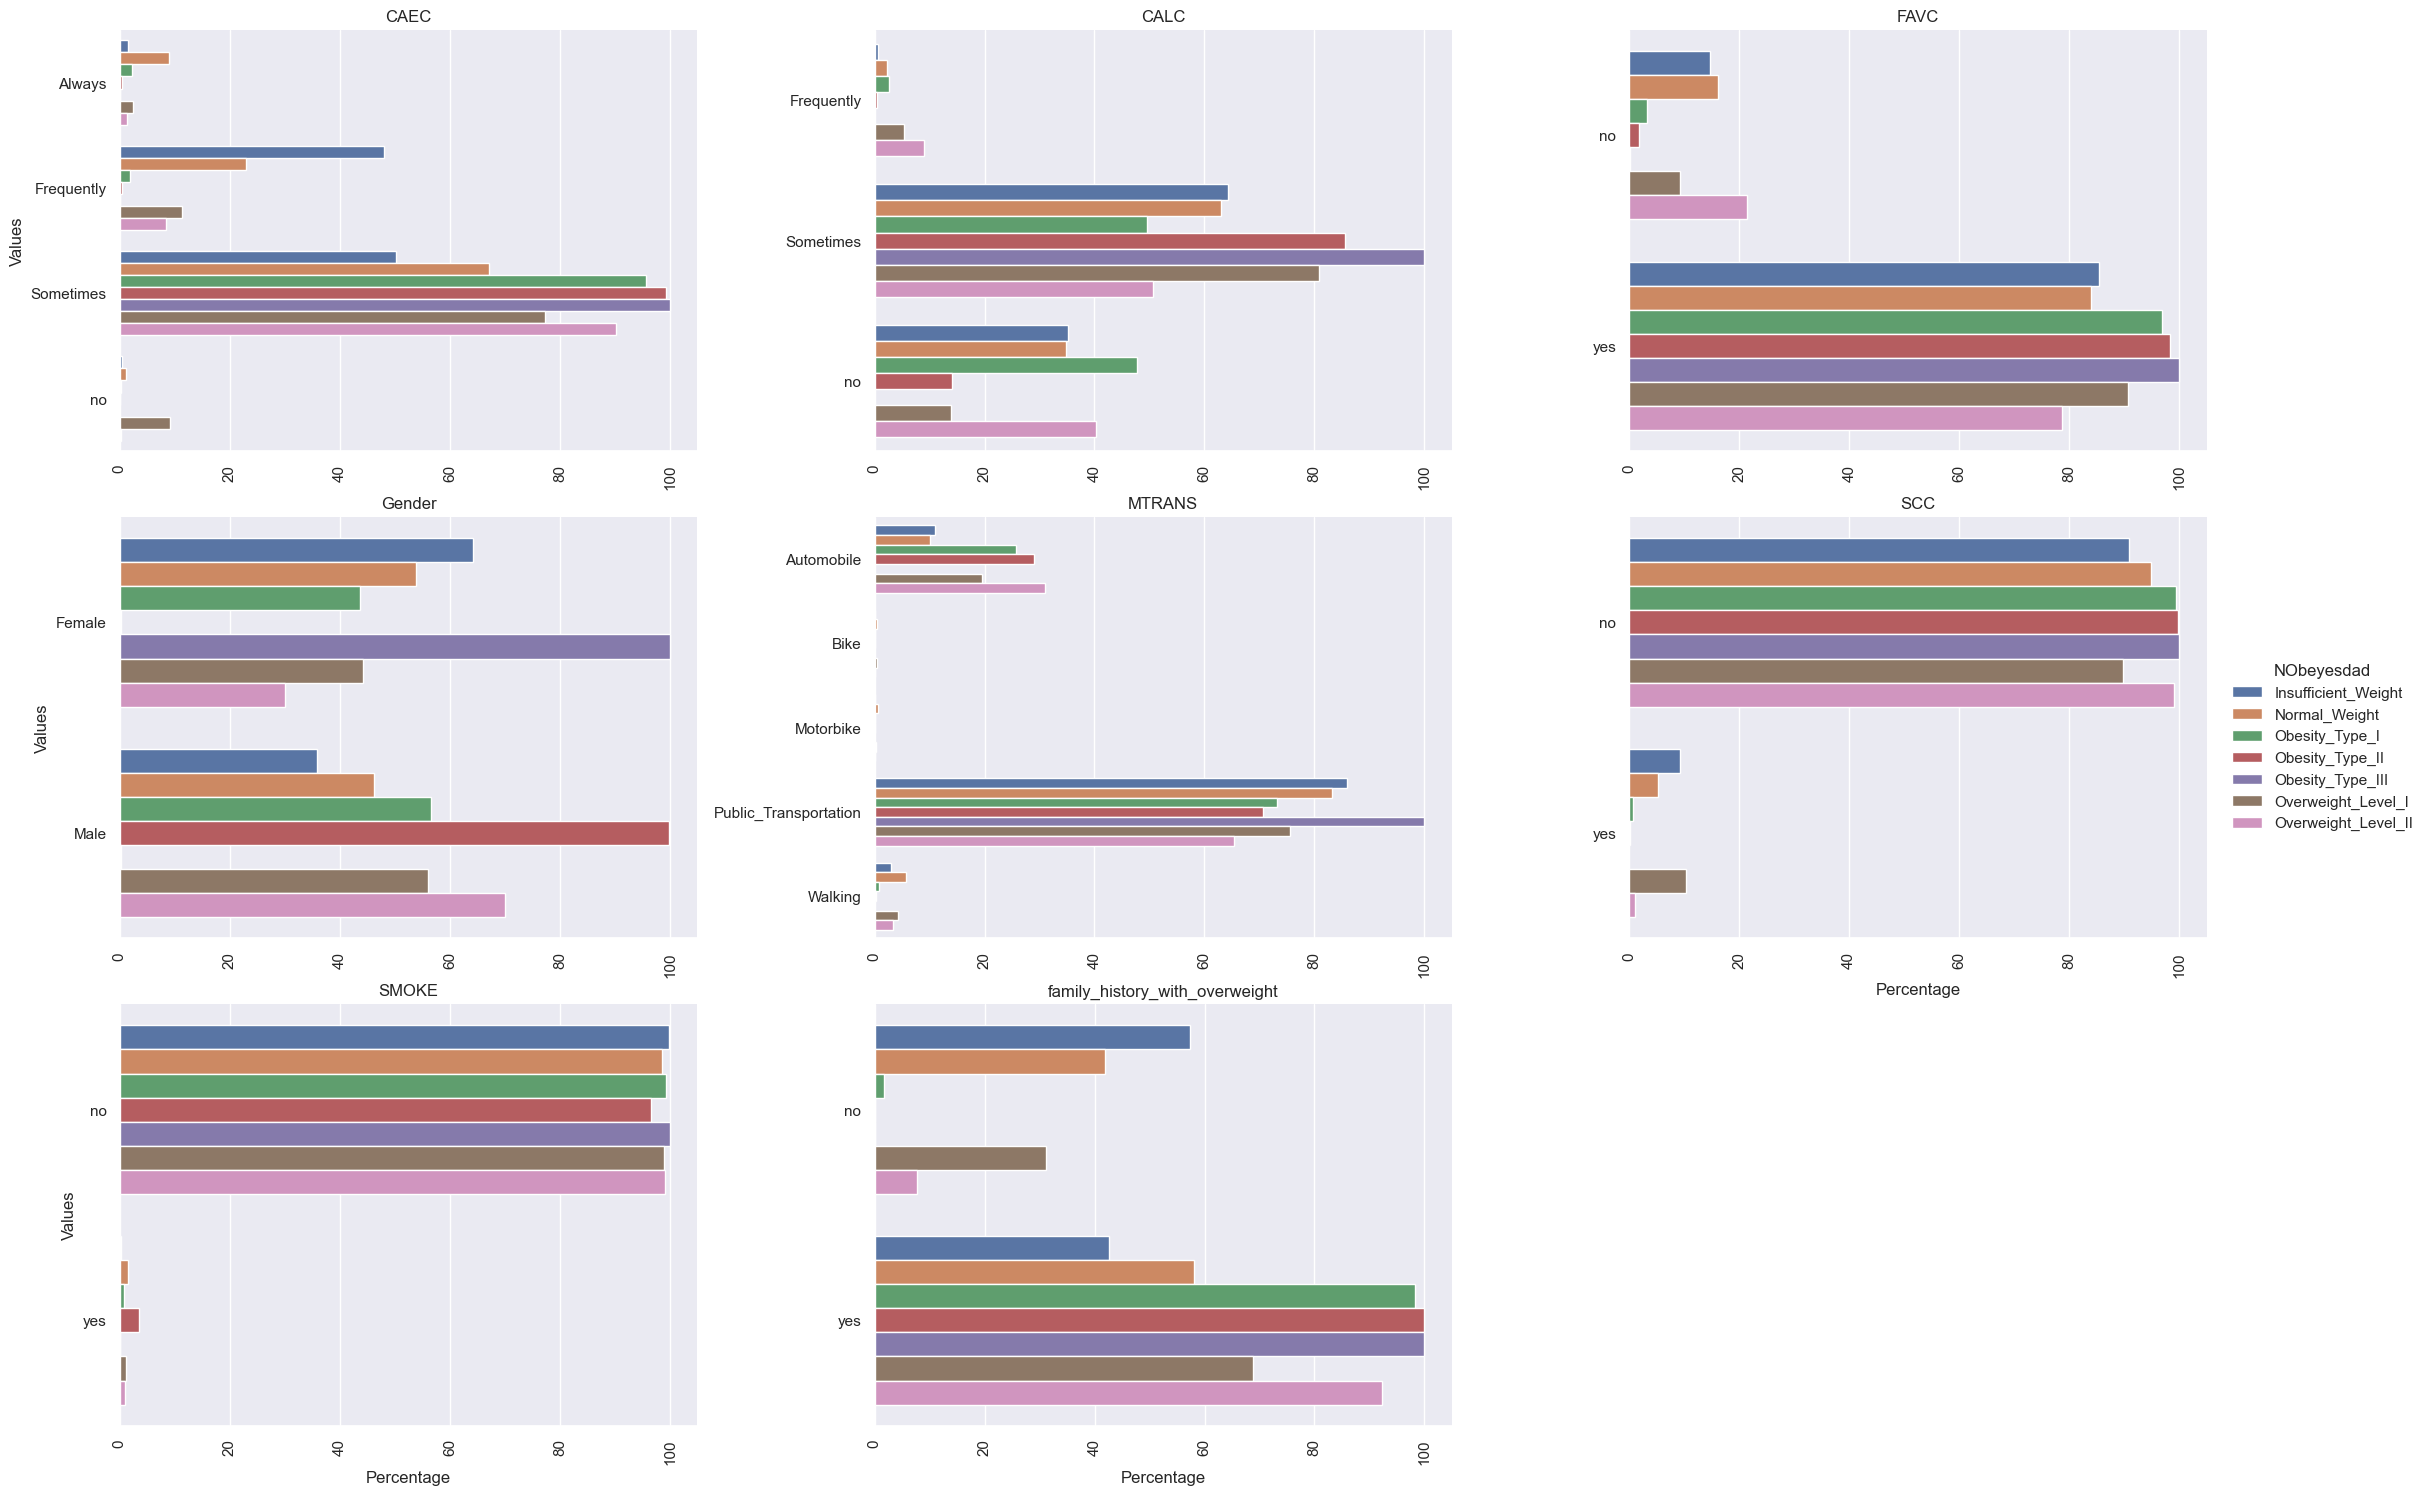

In [27]:
plot_tidy_categorical(df, categoricas, target)

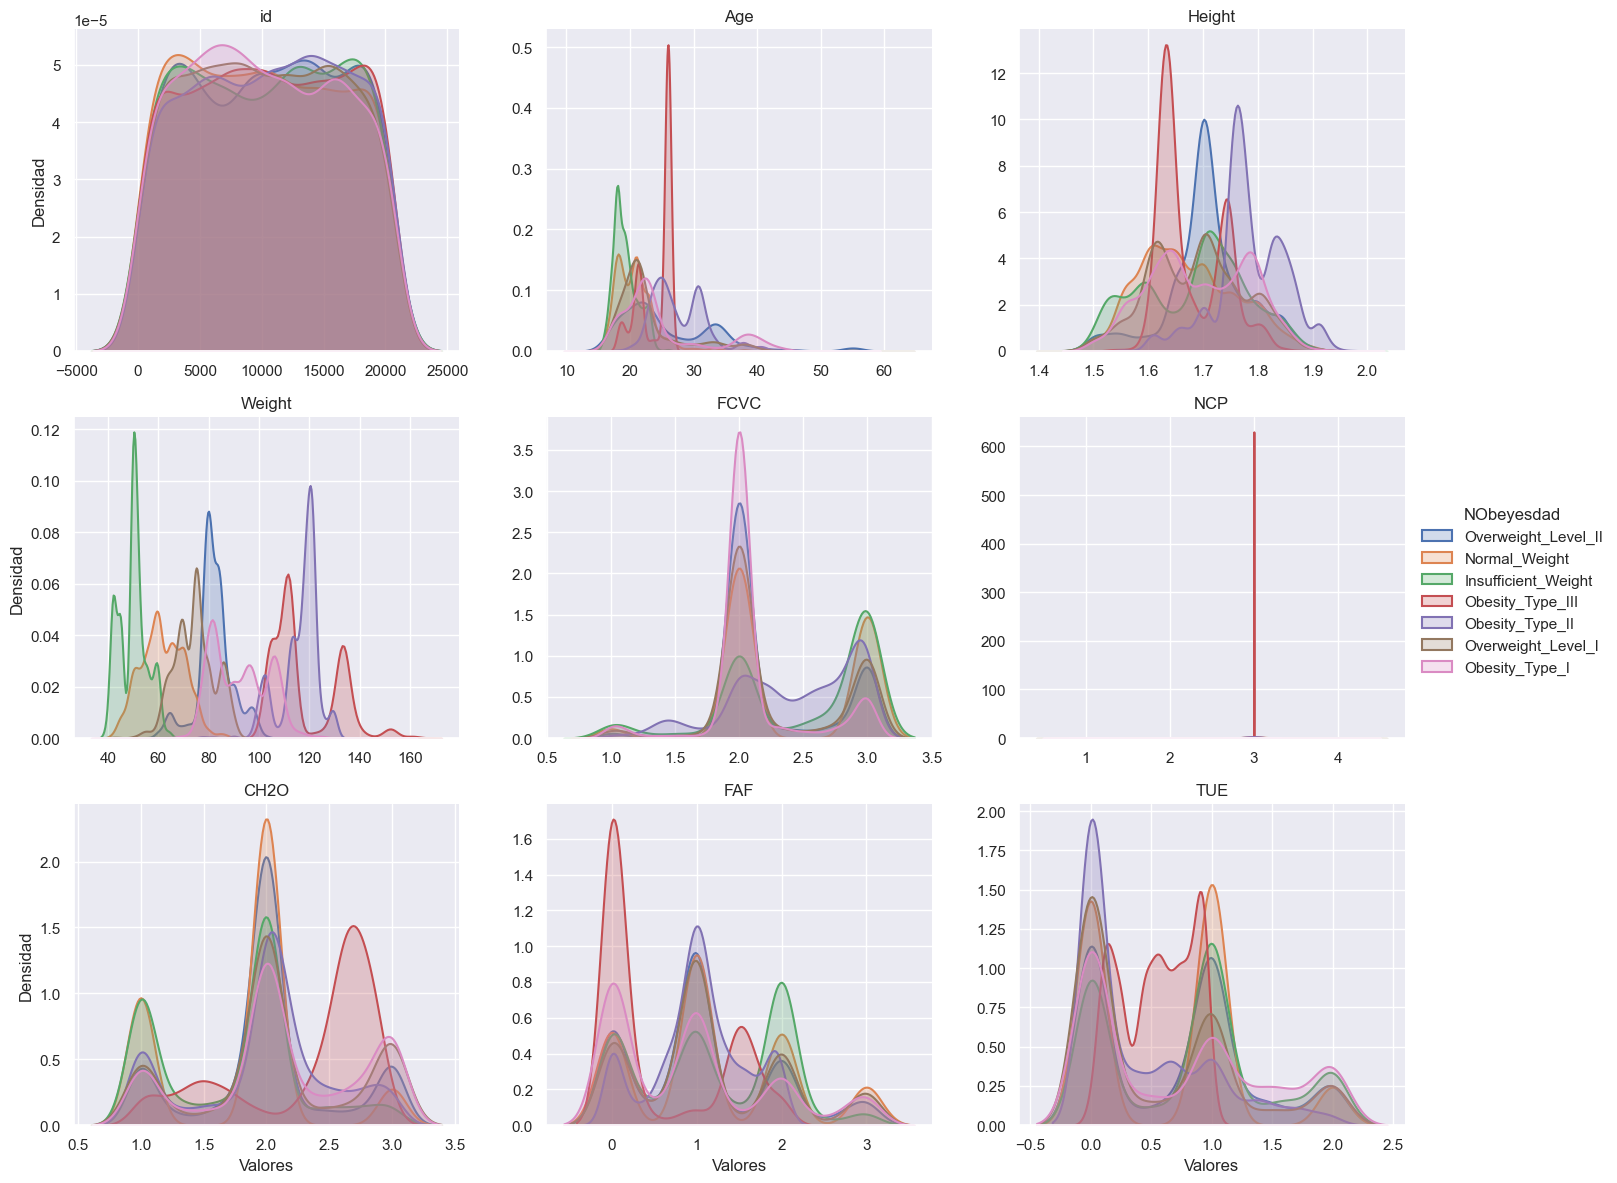

In [28]:
plot_tidy(df, numericas, target)

# Problema Machine Learning
   

In [29]:
df[target].value_counts() / len(df[target])

NObeyesdad
Obesity_Type_III      0.19
Obesity_Type_II       0.16
Normal_Weight         0.15
Obesity_Type_I        0.14
Insufficient_Weight   0.12
Overweight_Level_II   0.12
Overweight_Level_I    0.12
Name: count, dtype: float64

Al examinar la distribución del objetivo, podemos deducir lo siguiente:

- Se trata de un problema de clasificación múltiple, con 7 clases.
- Las clases están distribuidas de manera diferente, pero no hay diferencias extremas en sus proporciones (probabilidad media).
- Sin embargo, la clase más frecuente (Obesidad_Tipo_III) tiene casi el doble de probabilidad que la menos frecuente (Sobrepeso_Nivel_I). Por lo tanto, al definir la estrategia de validación cruzada, será estratificada  para que las diferentes probabilidades previas se reflejen lo más exactamente posible también en el conjunto de prueba.

# Feature Engineering


![](https://www.stylecraze.com/wp-content/themes/buddyboss-child/images/man-body-mass-index-vector.jpg)

Índice de Masa Corporal (IMC):
Utilizando las características de 'Altura' y 'Peso'. El IMC, una métrica ampliamente reconocida, indica la obesidad al proporcionar una representación más precisa de la relación entre el peso y la altura de un individuo.

Hábitos Alimenticios (HA):
La combinación de 'FCVC' (Frecuencia de consumo de vegetales) y 'NCP' (Número de comidas principales) creó la característica 'Hábitos_Alimenticios'. Esta característica busca encapsular los patrones dietéticos generales, considerando tanto la frecuencia de consumo de vegetales como el número de comidas principales.

Puntuación de Uso de Tecnología (UT):
Se creó una puntuación integral ponderando la frecuencia de uso de la tecnología ('UT') por la edad del individuo. La puntuación resultante de 'Uso_de_Tecnología' tiene como objetivo cuantificar el tiempo promedio que se pasa utilizando la tecnología en relación con la edad de la persona, proporcionando una perspectiva matizada sobre los hábitos tecnológicos.

Hay columnas que tienen orden y que deben convertirse a variables discretas. Las mapeo también.

In [30]:
dict_CAEC={
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3}
dict_CALC={
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3}

In [31]:
def Feature_Engineering(df):
    df.set_index('id', inplace=True)
    df['IMC'] = df['Weight'] / (df['Height'] ** 2)
    df['HA'] = df['FCVC'] * df['NCP']
    df['UT'] = df['TUE'] / df['Age']
    df['CALC']=df['CALC'].map(dict_CALC)
    df['CAEC']=df['CAEC'].map(dict_CAEC)
    return df

In [32]:
df_train = Feature_Engineering(df_train)
df_test = Feature_Engineering(df_test)
df = Feature_Engineering(df)
numericas = df.columns[df.dtypes!="object"].tolist()

In [33]:
diccionario_columnas = {
    'FAVC': 'Consumo frecuente de alimentos altos en calorías',
    'FCVC': 'Frecuencia de consumo de vegetales',
    'NCP': 'Número de comidas principales',
    'CAEC': 'Consumo de alimentos entre comidas',
    'CH20': 'Consumo de agua diario',
    'CALC': 'Consumo de alcohol',
    'SCC': 'Monitoreo del consumo de calorías',
    'FAF': 'Frecuencia de actividad física',
    'TUE': 'Tiempo utilizando dispositivos tecnológicos',
    'MTRANS': 'Transporte utilizado',
    'Age':'Edad',
    'Height': 'Altura',
    'Weight':'Peso',
    'SMOKE':'Fumador',
    'Gender':'Género',
    'IMC':'Indice de Masa Corporal',
    'HA': 'Hábitos alimienticios',
    'UT': 'Uso de Tecnología',
    'family_history_with_overweight':'Historial familiar con sobrepeso'
}


In [34]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
id                                                                           
0     Male 24.44    1.70   81.67                            yes  yes  2.00   
1   Female 18.00    1.56   57.00                            yes  yes  2.00   
2   Female 18.00    1.71   50.17                            yes  yes  1.88   
3   Female 20.95    1.71  131.27                            yes  yes  3.00   
4     Male 31.64    1.91   93.80                            yes  yes  2.68   

    NCP  CAEC SMOKE  CH2O SCC  FAF  TUE  CALC                 MTRANS  \
id                                                                     
0  2.98     1    no  2.76  no 0.00 0.98     1  Public_Transportation   
1  3.00     2    no  2.00  no 1.00 1.00     0             Automobile   
2  1.41     1    no  1.91  no 0.87 1.67     0  Public_Transportation   
3  3.00     1    no  1.67  no 1.47 0.78     1  Public_Transportation   
4  1.97     1    no  1.98  no 1.97 0.93     1  Public_Transportation   

             NObeyesdad   IMC   HA   UT  
id                                       
0   Overweight_Level_II 28.26 5.97 0.04  
1         Normal_Weight 23.42 6.00 0.06  
2   Insufficient_Weight 17.13 2.65 0.09  
3      Obesity_Type_III 44.86 9.00 0.04  
4   Overweight_Level_II 25.60 5.28 0.03

# Análisis univariante


In [ ]:
categoricas = df.columns[df.dtypes=="object"].tolist()
numericas = df.columns[df.dtypes!="object"].tolist()

In [ ]:
plot_horizontal_catplot(df, categoricas, diccionario_columnas)

In [ ]:
df[target]=df[target].map(dict_target)

In [ ]:
for col in numericas:
    plot_distribucion(df,col, title=diccionario_columnas.get(col, col))

# Análisis bivariante


In [ ]:
sns.set_theme(style='white')
sns.pairplot(df,kind="reg",diag_kind='kde',plot_kws={'line_kws':{'color':'red'}},corner=True,hue=target)
plt.tight_layout()
plt.show()


In [ ]:
for col in numericas:
    plot_analysis(df,target,col)


# Eliminación de features


In [ ]:
df = drop_cols(df, max_cardi=20, max_miss=30)

# Correlación

In [ ]:
import phik
phik_matrix = df.phik_matrix()

plt.figure(figsize=(25,10))
sns.heatmap(phik_matrix,
            vmin=0,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

# Anomalías y errores


No se han encontrado a la vista.
Se toman como anomalía los outliners que luego se detecten.


# Transformaciones (Encoding)
    

In [ ]:
def sqrt_transform(X):
    return np.sqrt(X)

def log_transform(X):
    return np.log1p(X)

In [ ]:
classify_distributions(df, threshold=0.05)

In [ ]:
df.head()

In [ ]:
# target no necesita transformación
y = df[target]

Guardo df, df_train y df_test antes de transformarlas

In [ ]:
# Save df as pickle
df.to_pickle(PATH.PROCESSED + 'df.pkl')
df_train.to_pickle(PATH.PROCESSED + 'df_train.pkl')
df_test.to_pickle(PATH.PROCESSED + 'df_test.pkl')

In [ ]:
# Load df as pickle
df = pd.read_pickle(PATH.PROCESSED + 'df.pkl')
df_train = pd.read_pickle(PATH.PROCESSED + 'df_train.pkl')
df_test = pd.read_pickle(PATH.PROCESSED + 'df_test.pkl')

Pipeline para transformar las columnas. Para ver la significancia, lo tengo que pasar a numéricas y ya veré si posteriormente elimino columnas antes de quitar outliners.

In [ ]:
dist_class = classify_distributions(df, threshold=0.05)

In [ ]:
list(df.select_dtypes(include=['number']).columns)


In [ ]:
def Encoder(df, target_col, threshold=0.05):
    if target_col not in df.columns:
        X = df.copy()
    else:
        X = df.drop(columns=[target_col])

    dist_class = classify_distributions(X, threshold)
    
    categorical_columns = list(X.select_dtypes(include=['object']).columns)

    if categorical_columns:
        categorical_pipeline = Pipeline([
            ('onehot', OneHotEncoder(drop='first'))
        ])
    else:
        categorical_pipeline = None
    
    numeric_columns_to_transform = [col for col, (dist,model) in dist_class.items()]
    untouched_columns = list(set(X.columns) - set(categorical_columns) - set(numeric_columns_to_transform))

    numeric_transformers = [
        ('sqrt_transform', FunctionTransformer(sqrt_transform), [col for col, (dist, _) in dist_class.items() if dist == 'positive_increasing']),
        ('log_transform', FunctionTransformer(log_transform), [col for col, (dist, _) in dist_class.items() if dist == 'positive_decreasing']),
        ('yeojohnson_transform', PowerTransformer(method='yeo-johnson'), [col for col, (dist, _) in dist_class.items() if dist not in ['positive_increasing', 'positive_decreasing']]),
        ('untouched', 'passthrough', untouched_columns)
    ]

    numeric_pipeline = Pipeline([
        ('transformation', ColumnTransformer(
            transformers=numeric_transformers,
            remainder='passthrough')
        ),
        ('scaler', StandardScaler())
    ])

    if categorical_pipeline:
        preprocessor = ColumnTransformer([
            ('categorical', categorical_pipeline, categorical_columns),
            ('numeric', numeric_pipeline, numeric_columns_to_transform)
        ])
    else:
        preprocessor = numeric_pipeline

    final_pipeline = Pipeline([
        ('preprocessor', preprocessor)
    ])

    required_columns = set([col for col, _ in dist_class.items()])
    if not required_columns.issubset(X.columns):
        missing_columns = required_columns - set(X.columns)
        raise ValueError(f"Missing columns: {missing_columns}")

    X_trans = final_pipeline.fit_transform(X)
    transformed_columns = []

    # Obtener columnas transformadas de OHE
    if categorical_columns:
        ohe_columns = final_pipeline.named_steps['preprocessor'].named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out()
        transformed_columns.extend(ohe_columns)

    # Obtener columnas transformadas de variables numéricas
    numeric_transformer = final_pipeline.named_steps['preprocessor'].named_transformers_['numeric'].named_steps['transformation']
    numeric_columns_transformed = [col for name, transformer, col in numeric_transformer.transformers_ if transformer != 'drop']
    transformed_columns.extend(numeric_columns_transformed)

    # Obtener columnas restantes
    remaining_columns = list(X.columns.difference(categorical_columns + numeric_columns_to_transform))
    transformed_columns.extend(remaining_columns)
    transformed_columns=list(pd.DataFrame(transformed_columns)[0].explode().dropna())
    
    return pd.DataFrame(X_trans, columns=transformed_columns)


    


In [ ]:
X_trans=Encoder(df, target, threshold=0.05)
X_test=Encoder(df_test, target, threshold=0.05)

# 3. División train y test
   

En la división aprovecho a quitar los outliiers para trabajos los modelos baselines

In [ ]:
from pyod.models.ecod import ECOD

In [ ]:
def outlier_split(X_trans,y, test_size=0.2):
    Xout=X_trans.copy()
    outclf = ECOD(n_jobs=-1)
    outclf.fit(Xout)
    mask = outclf.labels_  # binary labels (0: inliers, 1: outliers)
    X_trans_out=X_trans[mask==0]
    X_trans_out=pd.DataFrame(data=X_trans_out, columns=X_trans.columns)
    y_out=[y for  i,y in enumerate(y) if mask[i]==0]
    X_train, X_val, y_train, y_val = train_test_split(X_trans_out, y_out, test_size=test_size, random_state=123)
    return X_train, X_val, y_train, y_val

In [ ]:
X_train, X_val, y_train, y_val=outlier_split(X_trans,y, test_size=0.2)

In [ ]:
trainval=['X_train', 'X_val','y_train', 'y_val']
for data in trainval:
    if  isinstance(data,pd.DataFrame):
        globals()[data]=reduce_memory_usage(globals()[data])
    else:
        globals()[data]=reduce_memory_usage(pd.DataFrame((globals()[data])))

In [ ]:
# Guardar X_train, X_val, y_train, y_val
X_train.to_pickle(PATH.PROCESSED + 'X_train.pkl')
X_val.to_pickle(PATH.PROCESSED + 'X_val.pkl')
y_train.to_pickle(PATH.PROCESSED + 'y_train.pkl')
y_val.to_pickle(PATH.PROCESSED + 'y_val.pkl')

In [27]:
# Leer X_train, X_val, y_train, y_val
X_train = pd.read_pickle(PATH.PROCESSED + 'X_train.pkl')
X_val = pd.read_pickle(PATH.PROCESSED + 'X_val.pkl')
y_train = pd.read_pickle(PATH.PROCESSED + 'y_train.pkl')
y_val = pd.read_pickle(PATH.PROCESSED + 'y_val.pkl')


# 15. Feature Reduction


In [18]:
import random

def generate_random_numbers(dataframe_length, num_numbers=2000):
    return [random.randint(0, dataframe_length - 1) for _ in range(num_numbers)]


Por cuestión de tiempo de computación  no hago análsiis de todo el DataFrame. En su defecto, hago un random sample mayor del 10% de la muestra y lo tomo como representativo.

In [19]:
generate_random_numbers=generate_random_numbers(len(X_train),num_numbers=2000)
X_train_=X_train.iloc[generate_random_numbers]
y_train_=y_train.iloc[generate_random_numbers]

  0%|          | 0/100 [00:00<?, ?it/s]

16 attributes confirmed important: ['Height', 'Age', 'HA', 'TUE', 'MTRANS_Public_Transportation', 'CH2O', 'CAEC', 'Weight', 'FAF', 'FCVC', 'IMC', 'UT', 'NCP', 'CALC', 'Gender_Male', 'family_history_with_overweight_yes']
6 attributes confirmed unimportant: ['SCC_yes', 'SMOKE_yes', 'MTRANS_Bike', 'MTRANS_Walking', 'FAVC_yes', 'MTRANS_Motorbike']
0 tentative attributes remains: []
0 tentative features are now accepted: []
0 tentative features are now rejected: []


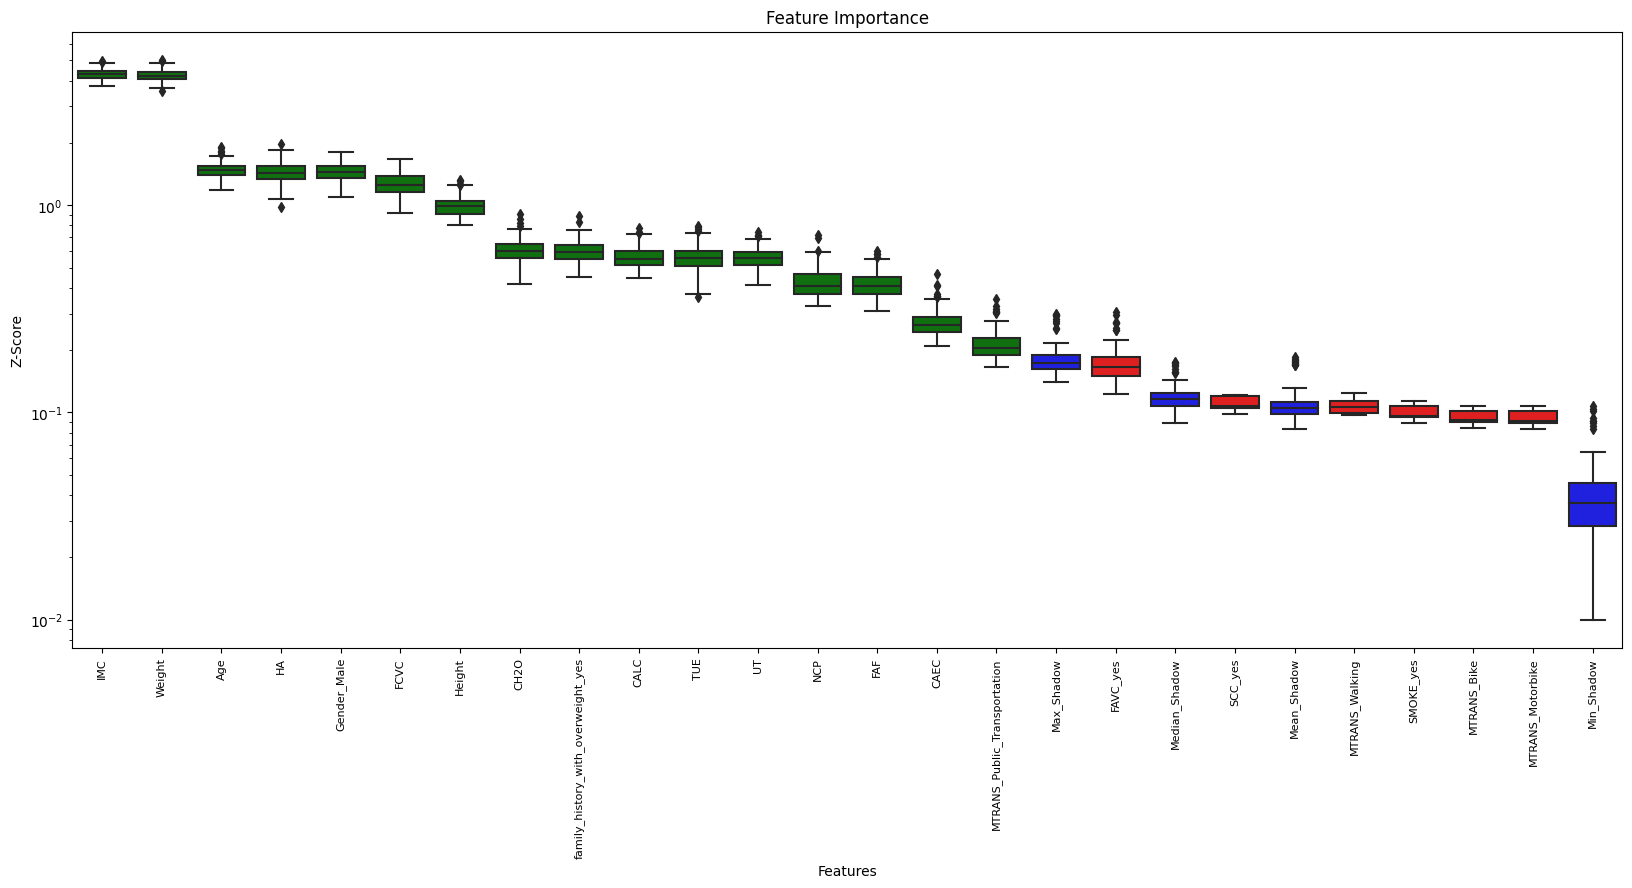

['Age',
 'CAEC',
 'CALC',
 'CH2O',
 'FAF',
 'FCVC',
 'Gender_Male',
 'HA',
 'Height',
 'IMC',
 'MTRANS_Public_Transportation',
 'NCP',
 'TUE',
 'UT',
 'Weight',
 'family_history_with_overweight_yes']

In [20]:
selvars=selvars_boruta(X_train_,y_train_,isclass=True,n_trials=100)
selvars

In [28]:
selvars=['Age',
 'CAEC',
 'CALC',
 'CH2O',
 'FAF',
 'FCVC',
 'Gender_Male',
 'HA',
 'Height',
 'IMC',
 'MTRANS_Public_Transportation',
 'NCP',
 'TUE',
 'UT',
 'Weight',
 'family_history_with_overweight_yes']

Tengo que validar que con el 10% de las columnas elegidas representan el conjunto del DataFrame de las columnas. 
Para ello hago un test de  Kolmogorov-Smirnov con cross validation para cada una de las columnas

In [71]:
results = test_distribution_cv(X_train, perfrac=0.45, columns=selvars, n_trials=10)

In [72]:
results

Columna  Perc_igual_dist_0.45
0                                  Age                 80.00
1                                 CAEC                100.00
2                                 CALC                100.00
3                                 CH2O                100.00
4                                  FAF                100.00
5                                 FCVC                100.00
6                          Gender_Male                100.00
7                                   HA                100.00
8                               Height                 90.00
9                                  IMC                100.00
10        MTRANS_Public_Transportation                100.00
11                                 NCP                100.00
12                                 TUE                100.00
13                                  UT                100.00
14                              Weight                100.00
15  family_history_with_overweight_yes                100.00

Hay que recalcular el Boruta para el 45% de la muestra

In [ ]:
X_train.isna().sum()

<AxesSubplot: xlabel='pca_2', ylabel='pca_1'>

Text(0.5, 1.0, 'Top 2 Principal Components')

KMeans(n_clusters=7, random_state=0)

<AxesSubplot: xlabel='pca_2', ylabel='pca_1'>

Text(0.5, 1.0, 'Kmeans en Top 2 Principal Components')

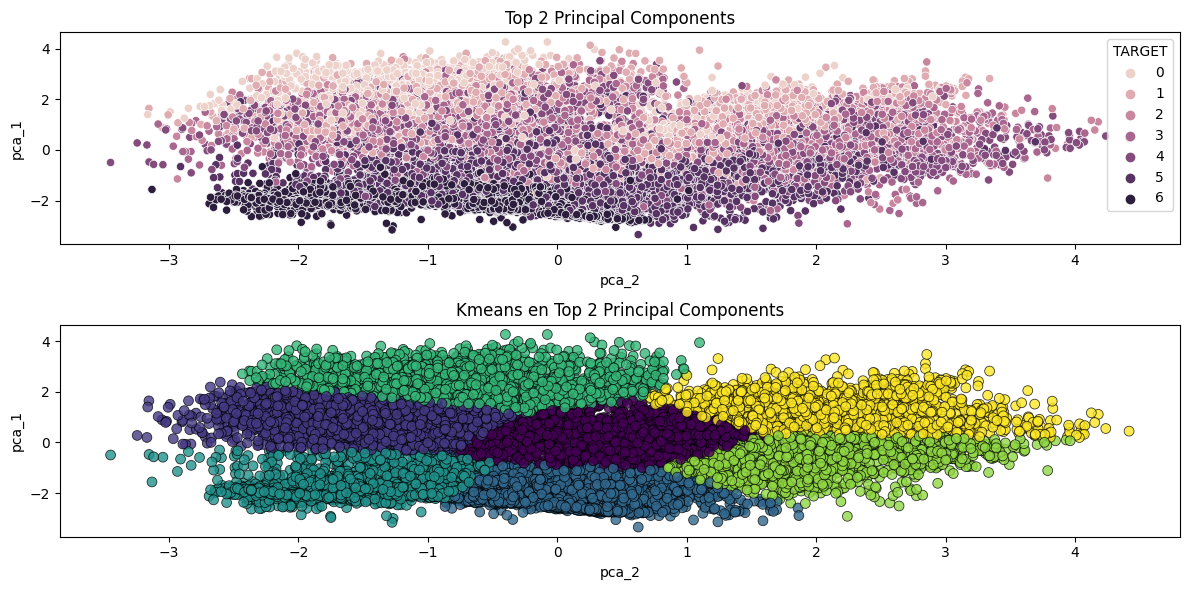

In [75]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#PCA
pca = PCA(n_components=2)
pca_top_2 = pca.fit_transform(X_train[selvars])

tmp = pd.DataFrame(data = pca_top_2, columns = ['pca_1','pca_2'])
tmp['TARGET'] = y_train

fig,axs = plt.subplots(2,1,figsize = (12,6))
sns.scatterplot(data=tmp, y="pca_1", x="pca_2", hue='TARGET',ax=axs[0])
axs[0].set_title("Top 2 Principal Components")

#KMeans
kmeans = KMeans(7,random_state=0)
kmeans.fit(tmp[['pca_1','pca_2']])
sns.scatterplot( y= tmp['pca_1'],x = tmp['pca_2'],c = kmeans.labels_,cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.8,ax = axs[1])
axs[1].set_title("Kmeans en Top 2 Principal Components")
plt.tight_layout()
plt.show()

Está completamente clusterizado sin outliers

# Escoger métrica del modelo


## Métricas de clasificación

Recall (Sensibilidad o Tasa de Verdaderos Positivos): Es la proporción de verdaderos positivos sobre el total de instancias que son realmente positivas. Se calcula como TP / (TP + FN).

 
Es útil por que no quiero dejar fuera a aquellas personas que sufran riesgo de enfermedad y no sean tratadas convenientemente ( quiero evitar falsos negativos).

# Baselines


In [21]:
# Modelos de Clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
#Meter CatBoost

In [60]:
modelos = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(gamma='scale', probability=True),
    'Naive Bayes': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(n_estimators=10),
    'Extra Trees': ExtraTreesClassifier(n_estimators=10),
    'XGBoost': XGBClassifier(),
    'Random Forest':RandomForestClassifier(n_estimators=10),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'LightGBM':LGBMClassifier(),
    'CatBoost': CatBoostClassifier()
}


In [29]:
# Reduzco el modelo a las variables seleccionadas
X_train_fs=X_train[selvars]
X_val_fs=X_val[selvars]

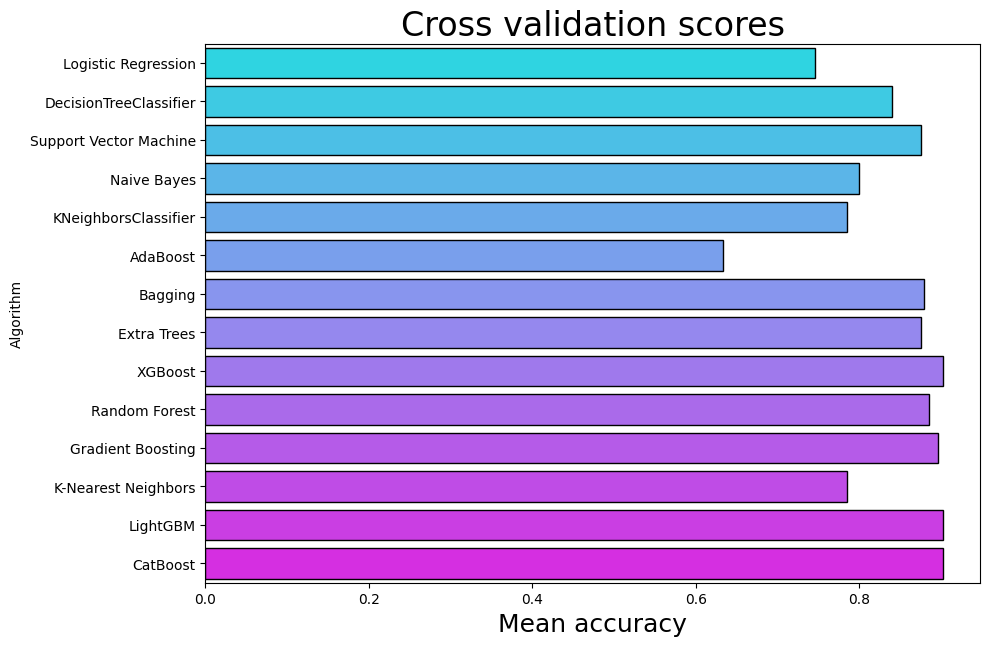

In [62]:
cv_df=perform_cross_validation(modelos, X_train_fs, y_train,  metric='accuracy')

In [68]:
from sklearn import metrics
cv_df.sort_values(by='CrossVal_Score_Means', ascending=False)

CrossVal_Score_Means               Algorithm
8                   0.90                 XGBoost
13                  0.90                CatBoost
12                  0.90                LightGBM
10                  0.90       Gradient Boosting
9                   0.89           Random Forest
6                   0.88                 Bagging
7                   0.88             Extra Trees
2                   0.88  Support Vector Machine
1                   0.84  DecisionTreeClassifier
3                   0.80             Naive Bayes
4                   0.79    KNeighborsClassifier
11                  0.79     K-Nearest Neighbors
0                   0.75     Logistic Regression
5                   0.63                AdaBoost

# Elegir hiperparámetros: Fine tuning



Hay 4 modelos pueden ser tuneados puesto que son los que mejor precisión tienen. En nuestro problema analizamos la métrica recall_macro para ver con cual empezamos a optimizar .



In [79]:
cv_df[cv_df.CrossVal_Score_Means>=0.89].Algorithm

8               XGBoost
10    Gradient Boosting
12             LightGBM
13             CatBoost
Name: Algorithm, dtype: object

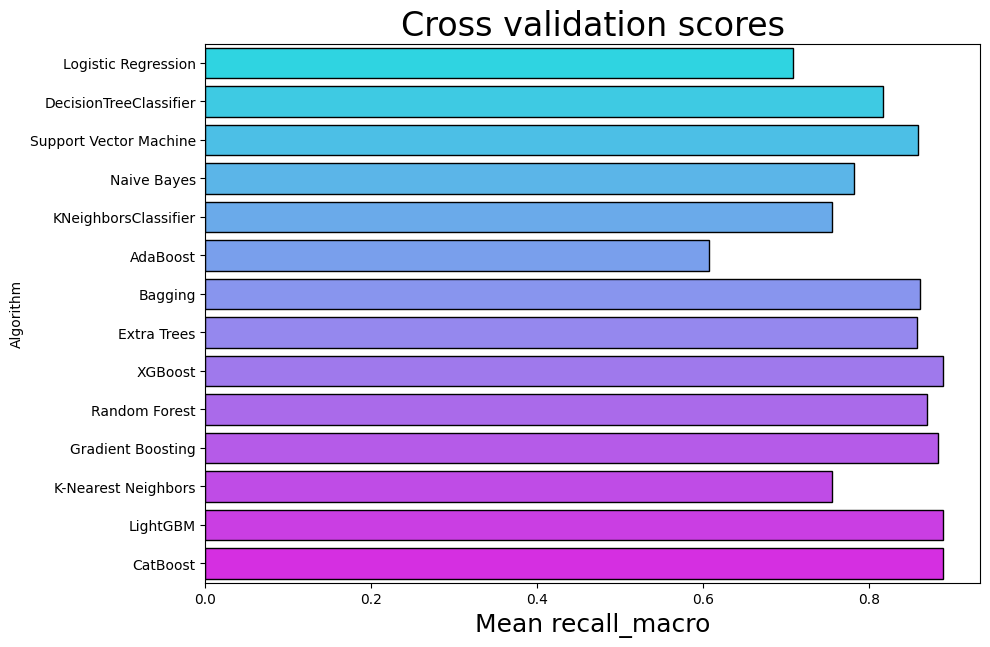

CrossVal_Score_Means               Algorithm
8                   0.89                 XGBoost
13                  0.89                CatBoost
12                  0.89                LightGBM
10                  0.88       Gradient Boosting
9                   0.87           Random Forest
6                   0.86                 Bagging
2                   0.86  Support Vector Machine
7                   0.86             Extra Trees
1                   0.82  DecisionTreeClassifier
3                   0.78             Naive Bayes
4                   0.76    KNeighborsClassifier
11                  0.76     K-Nearest Neighbors
0                   0.71     Logistic Regression
5                   0.61                AdaBoost

In [82]:
cv_df=perform_cross_validation(modelos, X_train_fs, y_train,  metric='recall_macro')
cv_df.sort_values(by='CrossVal_Score_Means', ascending=False)

El mejor sigue siendo Xgboost, por lo que haremos fine tuning con el, aunque el recall_macro ya es bastante bueno.

### Finetuning por RandomSearchCV

In [83]:
models4tune=modelos = {
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'LightGBM':LGBMClassifier(),
    'CatBoost': CatBoostClassifier()
}

In [86]:
range_params_models = {
        'XgBoost': {
                    "model": XGBClassifier(),
                    "params":       {
                                'learning_rate': uniform(0.01, 0.1),  # Tasa de aprendizaje
                                'n_estimators': randint(100, 200),  # Número de árboles
                                'max_depth': randint(6, 12),  # Profundidad máxima del árbol
                                'min_child_weight': randint(1, 10),  # Peso mínimo de la instancia necesaria en un hijo
                                'gamma': uniform(0, 0.25),  # Reducción mínima de la pérdida requerida para realizar una partición adicional en un nodo hoja del árbol
                                'subsample': uniform(0.75, 0.95),  # Proporción de submuestreo de las instancias de entrenamiento
                                'colsample_bytree': uniform(0.25, 0.5),  # Proporción de submuestreo de columnas al construir cada árbol
                                'reg_alpha': uniform(0, .25),  # Término de regularización L1 en los pesos
                                'reg_lambda': uniform(0, .25),  # Término de regularización L2 en los pesos
                                'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100]  # Proporción de pesos de muestras negativas a positivas
                                    }},
        "LightGBM":{
                    "model": LGBMClassifier(n_estimators= 100),
                    "params": {
                                'learning_rate': uniform(0.01, 0.1),  
                                'max_depth': [10,20,30,40],
                                'num_leaves': randint(20, 100),                 
                                'min_child_samples': randint(2, 20),
                                'lambda_l1':uniform(0, 0.1),
                                'lambda_l2':uniform(0, 0.1),
                                'num_leaves': randint(100, 200)
                                    }},
        "Gradient Boosting": {
                    "model": GradientBoostingClassifier(),
                    "params": {
                                'learning_rate': uniform(0.01, 0.3),  # Tasa de aprendizaje
                                'n_estimators': randint(100, 1000),  # Número de árboles
                                'max_depth': randint(3, 10),  # Profundidad máxima del árbol
                                'min_samples_split': randint(2, 20),  # Número mínimo de muestras requeridas para dividir un nodo interno
                                'min_samples_leaf': randint(1, 10),  # Número mínimo de muestras requeridas para estar en un nodo hoja
                                'subsample': uniform(0.6, 0.4),  # Proporción de submuestreo de las instancias de entrenamiento
                                'max_features': ['auto', 'sqrt', 'log2', None]  # Número máximo de características a considerar en cada nodo
                    }},    
        'CatBoost': {
                    "model":  CatBoostClassifier(),
                    "params": {
                    'learning_rate': uniform(0.01, 0.3),  # Tasa de aprendizaje
                    'n_estimators': randint(100, 1000),  # Número de árboles
                    'max_depth': randint(3, 10),  # Profundidad máxima del árbol
                    'l2_leaf_reg': uniform(1, 10),  # Regularización L2
                    'subsample': uniform(0.6, 0.4),  # Proporción de submuestreo de las instancias de entrenamiento
                    'colsample_bylevel': uniform(0.6, 0.4),  # Proporción de submuestreo de columnas para cada nivel del árbol
                    'bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS'],  # Tipo de bootstrap
                    'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],  # Política de crecimiento del árbol
                     }}}

In [ ]:
results_df=hyperparameter_tuning(range_params_models, X_train_fs, y_train,  scoring='recall_macro')

In [ ]:
best_params=results_df.loc[results_df['Best Score']==max(results_df['Best Score']),'Best Parameters'].to_dict()[0]
best_model_name=results_df.loc[results_df['Best Score']==max(results_df['Best Score']),'Model'].to_dict()[0]
best_model=modelos.get(best_model_name)

In [ ]:
model_tuned=best_model.set_params(**best_params)
model_tuned.fit(X_train,y_train)
y_pred=model_tuned.predict(X_val)
recall_score(y_val,y_pred,average='macro')

## Finetuning por Optuna

In [ ]:
%%time
def objective(trial):
    model = LGBMClassifier(
        n_estimators=trial.suggest_int("n_estimators", 100, 1000),
        max_depth=trial.suggest_int("max_depth", 1, 100),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        objective='multiclass',
        verbosity=-1,
        boosting_type=trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        lambda_l1=trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        lambda_l2=trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        num_leaves=trial.suggest_int('num_leaves', 2, 256),
        feature_fraction=trial.suggest_float('feature_fraction', 0.4, 1.0),
        bagging_fraction=trial.suggest_float('bagging_fraction', 0.4, 1.0),
        bagging_freq=trial.suggest_int('bagging_freq', 1, 7),
        min_child_samples=trial.suggest_int('min_child_samples', 5, 100)
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [ ]:
sampler = TPESampler(seed=27)
study = optuna.create_study(study_name="lgbm", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)


In [ ]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")
print()

## Finetuning por Pycaret

In [15]:
from pycaret.classification import *

In [43]:
data=X_train_fs.copy()
data[target]=y_train.values

In [46]:

exp1 = setup(data, target=target)

models = {
    'XGBoost': create_model('xgboost'),
    'Gradient Boosting': create_model('gbc'),
    'LightGBM': create_model('lightgbm'),
    'CatBoost': create_model('catboost')
}


In [47]:
# Fine-tuning de los modelos
tuned_models = {}
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}")
    tuned_model = tune_model(model, n_iter=50, optimize='recall')  # Ajuste con búsqueda aleatoria
    tuned_models[model_name] = tuned_model


Tuning hyperparameters for XGBoost


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Tuning hyperparameters for Gradient Boosting


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Tuning hyperparameters for LightGBM


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Tuning hyperparameters for CatBoost


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [49]:
# Save tuned_models to pickle in PATH.MODELS:
import pickle
with open(PATH.MODELS+'tuned_models.pkl', 'wb') as f:
    pickle.dump(tuned_models, f)


In [48]:
tuned_models

{'XGBoost': XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.5, device='cpu', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.05, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=10, max_leaves=None,
               min_child_weight=3, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=200, n_jobs=-1,
               num_parallel_tree=None, objective='multi:softprob', ...),
 'Gradient Boosting': GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.15, loss='log_loss', max_depth=5,
                            max_fea

In [51]:
for model in tuned_models.values():
    #save model to pickle:
    import pickle
    with open(PATH.MODELS+model.__class__.__name__+'.pkl', 'wb') as f:
        pickle.dump(model, f)

In [55]:
for name_model, model in tuned_models.items():
    print(name_model)
    try:
        print(model.get_all_params())
    except:
        print(model.get_params())
    print()

XGBoost
{'objective': 'multi:softprob', 'base_score': None, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.5, 'device': 'cpu', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 10, 'max_leaves': None, 'min_child_weight': 3, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 4617, 'reg_alpha': 0.005, 'reg_lambda': 0.4, 'sampling_method': None, 'scale_pos_weight': 24.5, 'subsample': 0.9, 'tree_method': 'auto', 'validate_parameters': None, 'verbosity': 0}

Gradient Boosting
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0

In [56]:
tuned_models_params = {}
for name_model, model in tuned_models.items():
    try:
        tuned_models_params[name_model] = model.get_all_params()
    except:
        tuned_models_params[name_model] = model.get_params()
    

In [58]:
# save tuned_models_params to pickle in PATH.MODELS:
import pickle
with open(PATH.MODELS+'tuned_models_params.pkl', 'wb') as f:
    pickle.dump(tuned_models_params, f)

In [59]:
tuned_models_names = list(tuned_models.keys())
tuned_models_names

['XGBoost', 'Gradient Boosting', 'LightGBM', 'CatBoost']

In [60]:
tuned_models_names=['XGBoost', 'Gradient Boosting', 'LightGBM', 'CatBoost']

In [61]:
# load tuned_models from pickle in PATH.MODELS:
import pickle
with open(PATH.MODELS+'tuned_models.pkl', 'rb') as f:
    tuned_models_pkl = pickle.load(f)

# Validación, prestaciones, ROC AUC


In [69]:
from sklearn.model_selection import learning_curve,LearningCurveDisplay
from sklearn.model_selection import ShuffleSplit

In [64]:
X_val_fs=X_val[selvars]

************************************************************
------------------------------------------------------------
XGBoost
------------------------------------------------------------

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)
---------------------------------------------

Fold 1:
Confusion Matrix:
[[26  1  0  0  0  0  0]
 [ 0 52  3  0  0  0  0]
 [ 0  6 28  8  2  0  0]
 [ 0  1  7 34  5  0  0]
 [ 0  0  1  2 52  2  0]
 [ 0  0  0  0  3 62  0]
 [ 0  0  0  0  0  0 79]]



Classification Report:


0     1     2     3     4     5     6  accuracy  macro avg  \
precision  1.00  0.87  0.72  0.77  0.84  0.97  1.00      0.89       0.88   
recall     0.96  0.95  0.64  0.72  0.91  0.95  1.00      0.89       0.88   
f1-score   0.98  0.90  0.67  0.75  0.87  0.96  1.00      0.89       0.88   
support   27.00 55.00 44.00 47.00 57.00 65.00 79.00      0.89     374.00   

           weighted avg  
precision          0.89  
recall             0.89  
f1-score           0.89  
support          374.00

precision  recall  f1-score  support
0                  0.99    0.99      0.99   266.00
1                  0.98    0.99      0.98   550.00
2                  0.97    0.96      0.96   442.00
3                  0.97    0.97      0.97   474.00
4                  0.98    0.98      0.98   572.00
5                  1.00    0.99      0.99   649.00
6                  1.00    1.00      1.00   784.00
accuracy           0.99    0.99      0.99     0.99
macro avg          0.98    0.98      0.98  3737.00
weighted avg       0.99    0.99      0.98  3737.00

=>  ANÁLISIS OVERFITTING



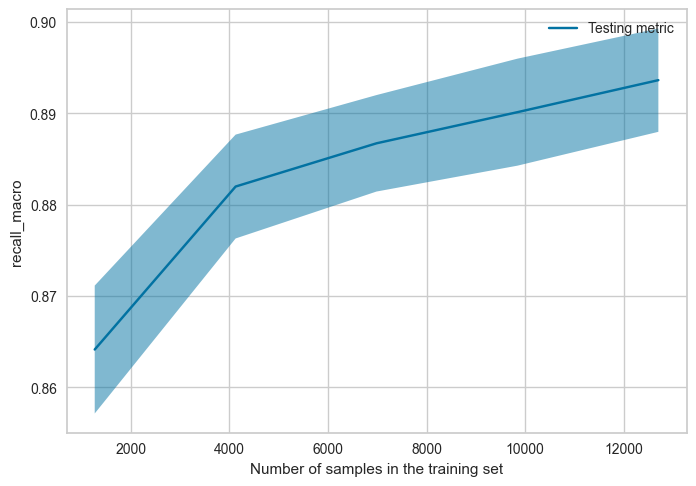

************************************************************
------------------------------------------------------------
Gradient Boosting
------------------------------------------------------------

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='log_loss', max_depth=5,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0005, min_samples_leaf=1,
                           min_samples_split=9, min_weight_fraction_leaf=0.0,
                           n_estimators=70, n_iter_no_change=None,
                           random_state=4617, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
------------------------------------------------------------

=> CONFUSION MATRIX


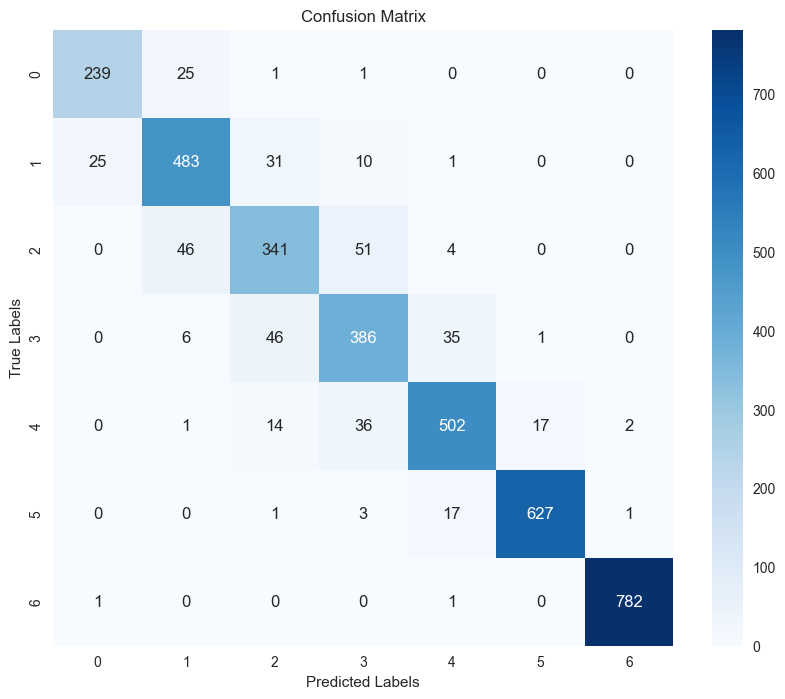

Fold 1:
Confusion Matrix:
[[24  3  0  0  0  0  0]
 [ 0 51  4  0  0  0  0]
 [ 0  6 29  8  1  0  0]
 [ 0  0  8 34  5  0  0]
 [ 0  0  1  3 52  1  0]
 [ 0  0  0  0  2 63  0]
 [ 0  0  0  0  0  0 79]]


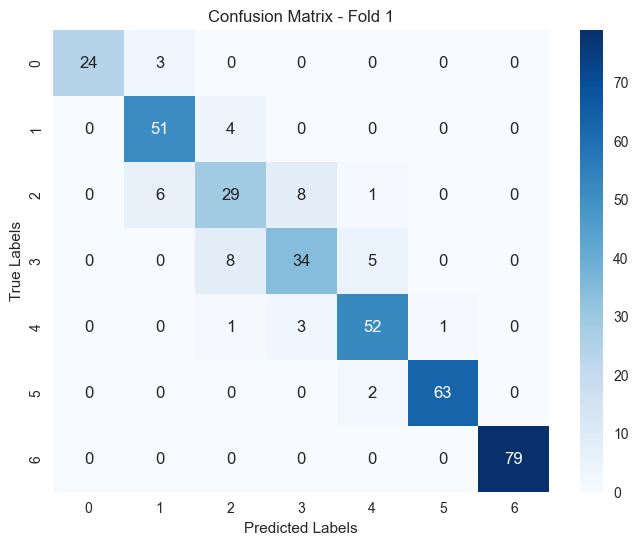


Classification Report:


0     1     2     3     4     5     6  accuracy  macro avg  \
precision  1.00  0.85  0.69  0.76  0.87  0.98  1.00      0.89       0.88   
recall     0.89  0.93  0.66  0.72  0.91  0.97  1.00      0.89       0.87   
f1-score   0.94  0.89  0.67  0.74  0.89  0.98  1.00      0.89       0.87   
support   27.00 55.00 44.00 47.00 57.00 65.00 79.00      0.89     374.00   

           weighted avg  
precision          0.89  
recall             0.89  
f1-score           0.89  
support          374.00

precision  recall  f1-score  support
0                  0.90    0.90      0.90   266.00
1                  0.86    0.88      0.87   550.00
2                  0.79    0.77      0.78   442.00
3                  0.79    0.81      0.80   474.00
4                  0.90    0.88      0.89   572.00
5                  0.97    0.97      0.97   649.00
6                  1.00    1.00      1.00   784.00
accuracy           0.90    0.90      0.90     0.90
macro avg          0.89    0.89      0.89  3737.00
weighted avg       0.90    0.90      0.90  3737.00

=>  ANÁLISIS OVERFITTING



************************************************************
------------------------------------------------------------
LightGBM
------------------------------------------------------------

LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=21, min_child_weight=0.001, min_split_gain=0.8,
               n_estimators=250, n_jobs=-1, num_leaves=50, objective=None,
               random_state=4617, reg_alpha=0.4, reg_lambda=0.4, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
------------------------------------------------------------

=> CONFUSION MATRIX
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored.

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2640
[LightGBM] [Info] Number of data points in

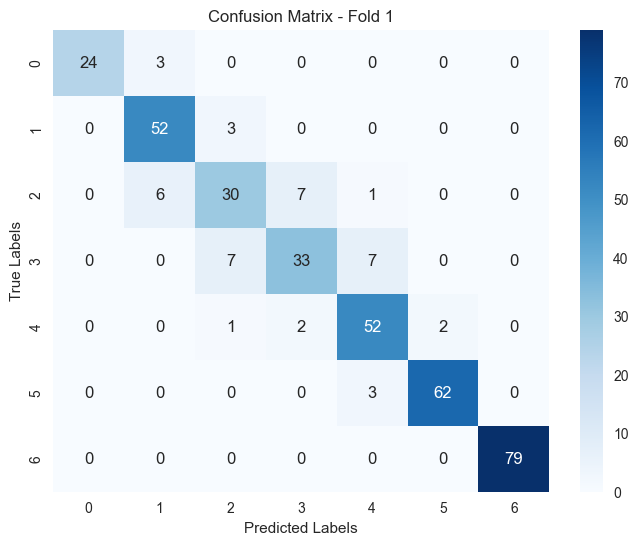


Classification Report:


0     1     2     3     4     5     6  accuracy  macro avg  \
precision  1.00  0.85  0.73  0.79  0.83  0.97  1.00      0.89       0.88   
recall     0.89  0.95  0.68  0.70  0.91  0.95  1.00      0.89       0.87   
f1-score   0.94  0.90  0.71  0.74  0.87  0.96  1.00      0.89       0.87   
support   27.00 55.00 44.00 47.00 57.00 65.00 79.00      0.89     374.00   

           weighted avg  
precision          0.89  
recall             0.89  
f1-score           0.89  
support          374.00

precision  recall  f1-score  support
0                  0.90    0.91      0.90   266.00
1                  0.86    0.89      0.88   550.00
2                  0.78    0.78      0.78   442.00
3                  0.81    0.78      0.80   474.00
4                  0.89    0.89      0.89   572.00
5                  0.98    0.97      0.97   649.00
6                  1.00    1.00      1.00   784.00
accuracy           0.90    0.90      0.90     0.90
macro avg          0.89    0.89      0.89  3737.00
weighted avg       0.90    0.90      0.90  3737.00

=>  ANÁLISIS OVERFITTING



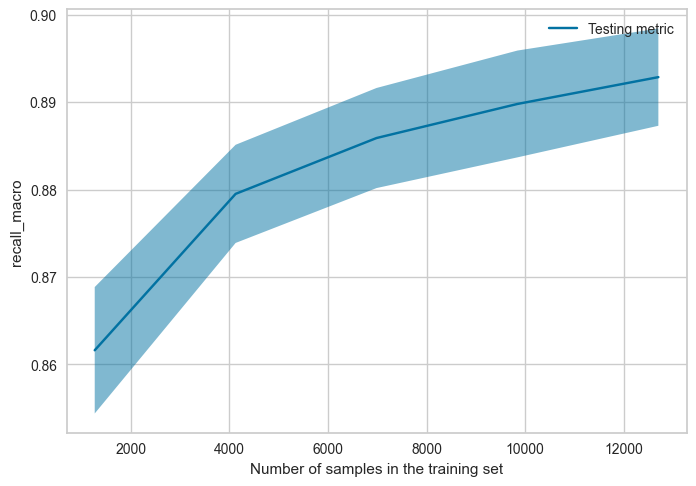

************************************************************
------------------------------------------------------------
CatBoost
------------------------------------------------------------

------------------------------------------------------------

=> CONFUSION MATRIX


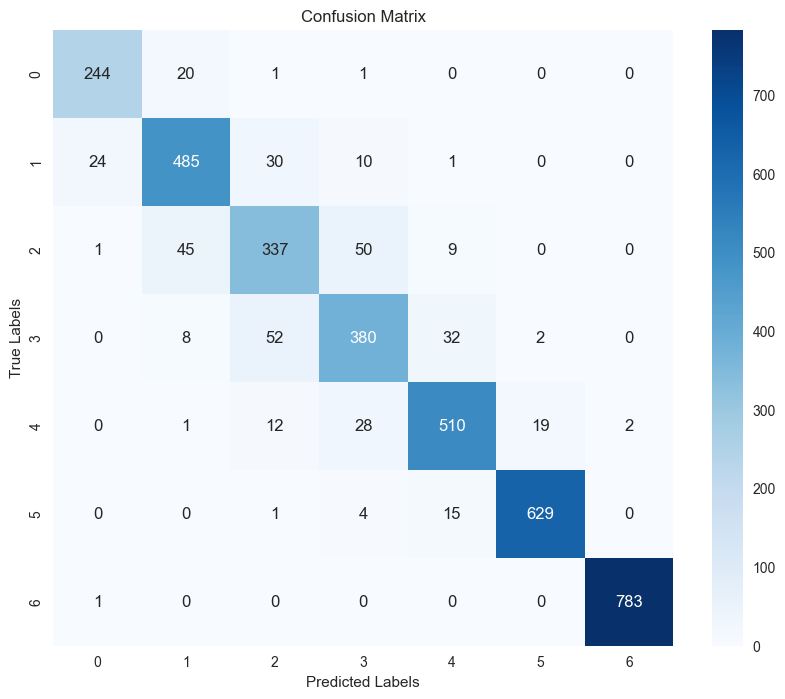

Fold 1:
Confusion Matrix:
[[26  1  0  0  0  0  0]
 [ 0 52  3  0  0  0  0]
 [ 0  9 26  7  2  0  0]
 [ 0  0  7 35  5  0  0]
 [ 0  0  1  1 53  2  0]
 [ 0  0  0  0  2 63  0]
 [ 0  0  0  0  0  0 79]]



Classification Report:


0     1     2     3     4     5     6  accuracy  macro avg  \
precision  1.00  0.84  0.70  0.81  0.85  0.97  1.00      0.89       0.88   
recall     0.96  0.95  0.59  0.74  0.93  0.97  1.00      0.89       0.88   
f1-score   0.98  0.89  0.64  0.78  0.89  0.97  1.00      0.89       0.88   
support   27.00 55.00 44.00 47.00 57.00 65.00 79.00      0.89     374.00   

           weighted avg  
precision          0.89  
recall             0.89  
f1-score           0.89  
support          374.00

precision  recall  f1-score  support
0                  0.90    0.92      0.91   266.00
1                  0.87    0.88      0.87   550.00
2                  0.78    0.76      0.77   442.00
3                  0.80    0.80      0.80   474.00
4                  0.90    0.89      0.90   572.00
5                  0.97    0.97      0.97   649.00
6                  1.00    1.00      1.00   784.00
accuracy           0.90    0.90      0.90     0.90
macro avg          0.89    0.89      0.89  3737.00
weighted avg       0.90    0.90      0.90  3737.00

=>  ANÁLISIS OVERFITTING



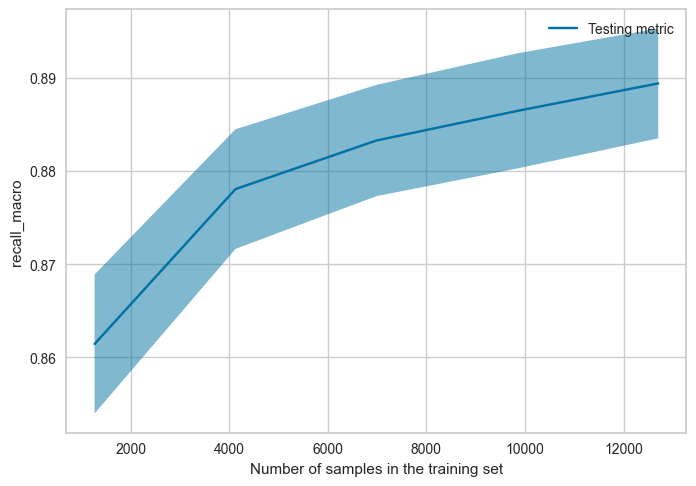

In [71]:
for model_name,model_tuned in tuned_models_pkl.items():
    print('**'*30)
    print('--'*30)
    print(model_name)
    print('--'*30)
    print()
    print('=> CONFUSION MATRIX')
    y_pred = model_tuned.predict(X_val_fs)
    plot_confusion_matrix(y_val, y_pred)
    cross_validation_with_confusion_matrix(model_tuned, X_val_fs, y_val, nsplits=10)
    Classification_report = pd.DataFrame.from_dict(classification_report(y_val, y_pred, output_dict=True)).T
    Classification_report
    #print('--'*30)
    #print()
    #print('=>  ROC')
    #print()
    #generate_roc_auc(model_tuned, X_train_fs, y_train, X_val_fs, y_val)
    print('=>  ANÁLISIS OVERFITTING')
    print()
    test_size_coef=0.2
    cv=5
    train_sizes=np.linspace(0.1, 1.0, 10)
    score='recall_macro'
    t_size=0.15
    perc_pca=0.95
    thresh_norm=0.05
    steps=5

    train_sizes, train_scores, test_scores=learning_curve(model_tuned, X_train_fs, y_train, cv=ShuffleSplit(n_splits=50, test_size=t_size, random_state=0), 
                                                          n_jobs=-1, train_sizes=np.linspace(0.1, 1.0,steps), scoring=score)
    display = LearningCurveDisplay(train_sizes=train_sizes,
        train_scores=train_scores, test_scores=test_scores, score_name=score)
    display.plot()
    plt.show()
    
    

In [83]:
from sklearn.metrics import recall_score
all_scores = []
for name_model, model in tuned_models_pkl.items():
    y_pred = model.predict(X_val_fs)
    score = recall_score(y_val, y_pred, average='macro')
    all_scores.append({'Model': name_model, 'Recall': score})

all_scores=pd.DataFrame(all_scores)
all_scores.sort_values('Recall',ascending=False,inplace=True)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


In [84]:
all_scores

Model  Recall
1  Gradient Boosting    0.98
0            XGBoost    0.98
3           CatBoost    0.98
2           LightGBM    0.95

# Metamodelo

El modelo que mejor recall tiene es GradientBoosting, por lo que podemos general un metamodelo con estimadores modelo todos y ver si mejora


In [90]:
from sklearn.ensemble import StackingClassifier


In [87]:
meta_model=tuned_models_pkl['Gradient Boosting']

In [86]:
X_test_fs=X_test[selvars]

NameError: name 'X_test' is not defined

In [91]:
#Uno los dataframe X_train_fs y X_val_fs
X_train_meta=pd.concat([X_train_fs,X_val_fs],axis=0)
y_train_meta=pd.concat([y_train,y_val],axis=0)

In [93]:
base_models=[
    ('XGBoost',tuned_models_pkl['XGBoost']),
    ('Gradient Boosting',tuned_models_pkl['Gradient Boosting']),
    ('LightGBM',tuned_models_pkl['LightGBM']),
    ('CatBoost',tuned_models_pkl['CatBoost'])]

In [94]:
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train_meta, y_train_meta)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2760
[LightGBM] [Info] Number of data points in the train set: 18682, number of used features: 16
[LightGBM] [I

In [ ]:
# Save stacking model to pickle in PATH.MODELS:
import pickle
with open(PATH.MODELS+'stacking_model.pkl', 'wb') as f:
    pickle.dump(stacking_model, f)

In [ ]:
y_pred = stacking_model.predict(X_test_fs)


# 21. Bonus Track